In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

### Выгрузим данные

In [2]:
boston_dataset = load_boston()
print('boston_dataset_keys = ', boston_dataset.keys())

boston_dataset_keys =  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Посмотрим на описание данных

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Сформируем датафрейм

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
print("boston.shape = ", boston.shape)
boston.head()

boston.shape =  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Проверим датасет на предмет пропущенных значений

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Нарисуем матрицу корреляций

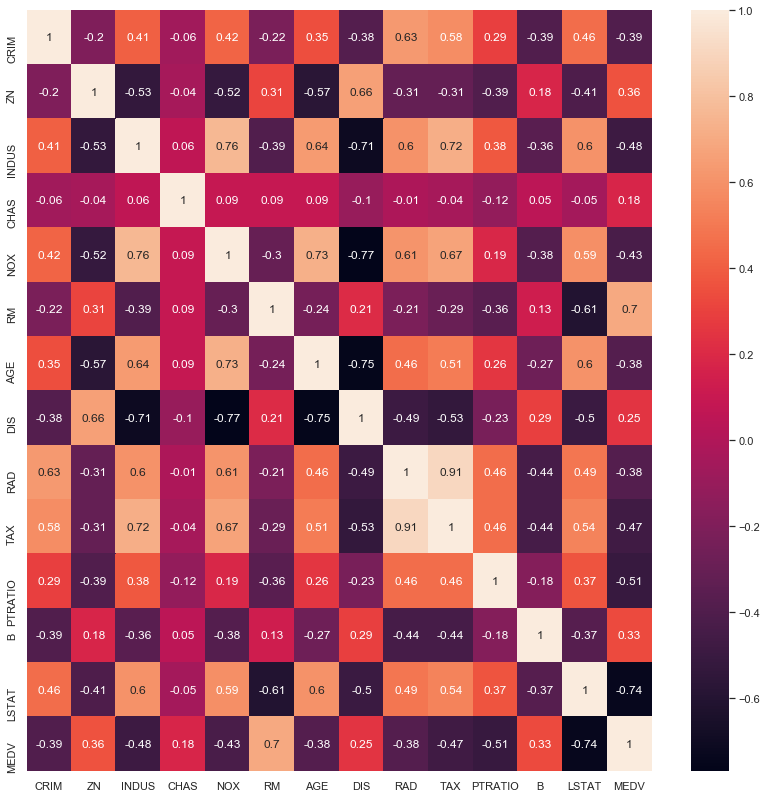

In [6]:
correlation_matrix = boston.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

### Посмотрим на распределение целевой метки

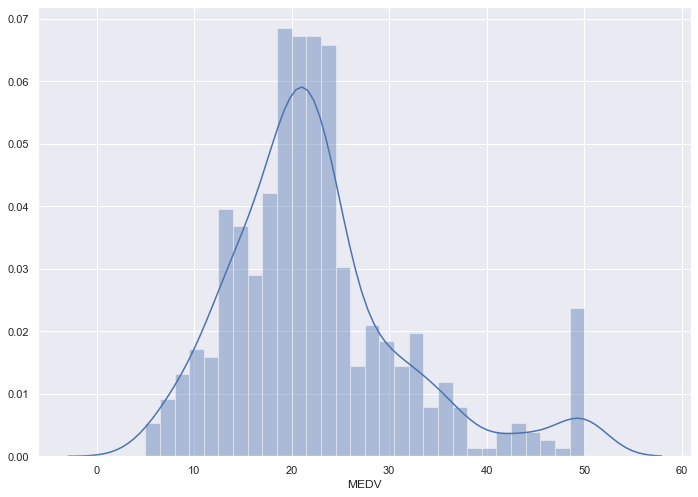

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Отрисуем зависимости между целевой меткой и наиболее коррелирующими признаками

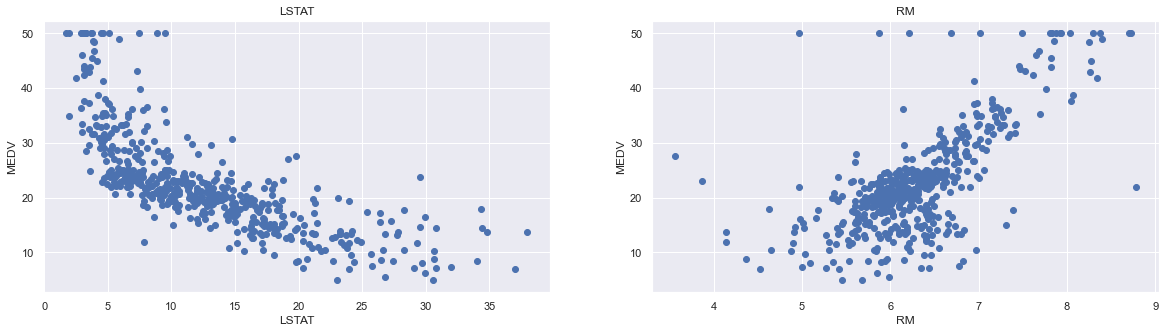

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Разделим данные

In [15]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [51]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


### Разделим данные на обучающую и тестовую выборки

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Обучим модель линейной регрессии

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Посмотрим на результаты

In [18]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.6371293350711955
The model performance for testing set
RMSE is 5.137400784702911


### Рассмотрим распределение ошибки

In [19]:
errors = (Y_test-y_test_predict).to_numpy()

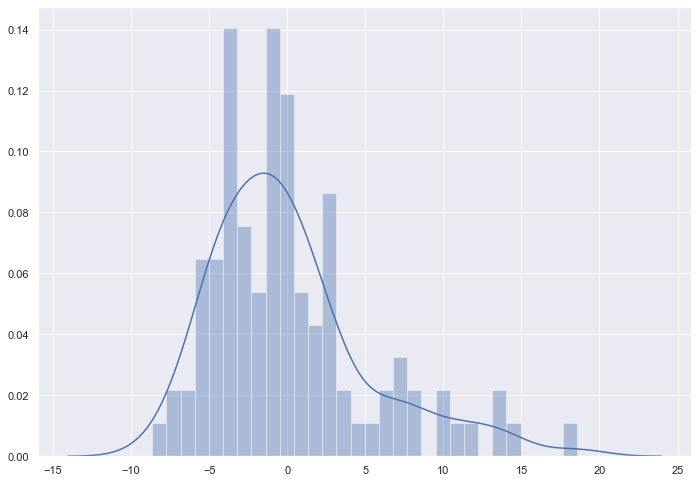

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(errors, bins=30)
plt.show()

# Задание

1) На датасете https://www.kaggle.com/mohansacharya/graduate-admissions построить модель линейной регрессии.
    Попытаться получить хороший результат на отложенной выборке, не переобучиться, поотбирать фичи, попробовать модели с регуляризацией при необходимости

In [21]:
df = pd.read_csv('Admission_Predict.csv')

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.shape

(400, 9)

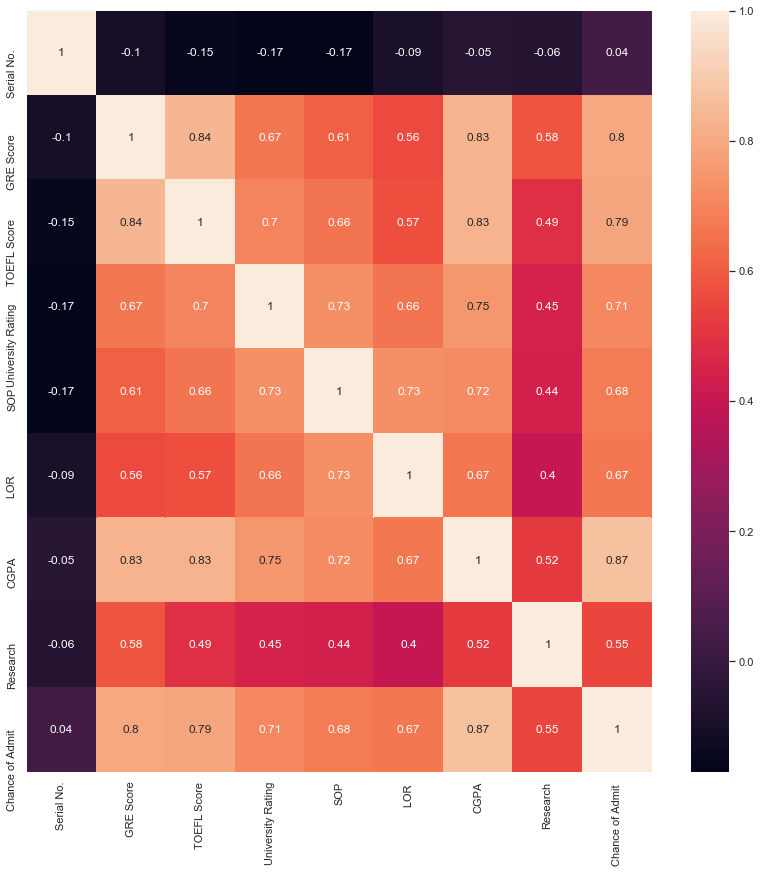

In [25]:
admission_corr = df.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=admission_corr, annot=True)

## The most correlated with target  are GRE Score and CGPA features

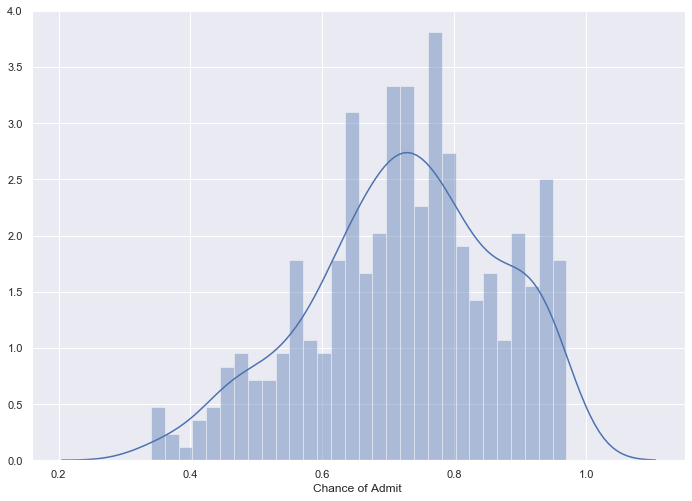

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Chance of Admit '], bins=30)
plt.show()

In [32]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [33]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

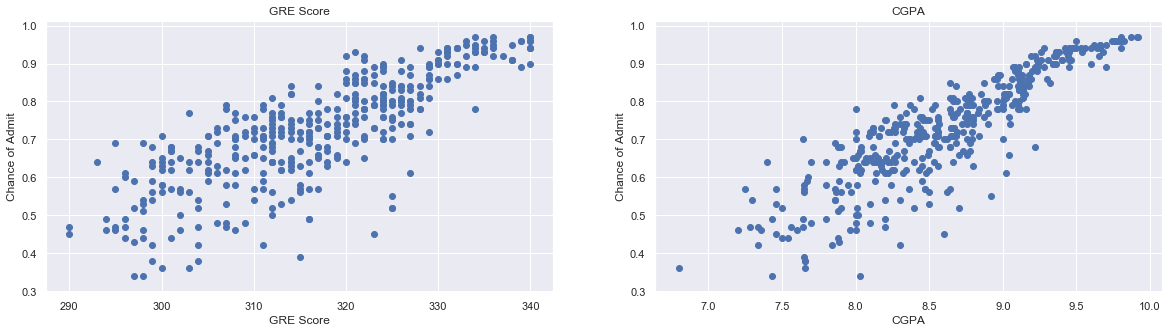

In [35]:
plt.figure(figsize=(20, 5))

features = ['GRE Score', 'CGPA']
target = df['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')

## almost linear 

In [38]:
X_adm = pd.DataFrame(np.c_[df['GRE Score'], df['CGPA']], columns = ['GRE Score','CGPA'])
Y_adm = df['Chance of Admit ']

In [50]:
print(Y_adm)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


In [89]:
X_adm_train, X_adm_test, Y_adm_train, Y_adm_test = train_test_split(X_adm, Y_adm, test_size = 0.2, random_state=5)

In [90]:
lin_model = LinearRegression()
lin_model.fit(X_adm_train, Y_adm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
def printRMSE(model, x, y, fit_type):
    y_res = model.predict(x)
    rmse = (np.sqrt(mean_squared_error(y, y_res)))

    print("for model ", model)
    print('The model performance for {} set'.format(fit_type))
    print('RMSE is {}'.format(rmse))


In [92]:
printRMSE(lin_model, X_adm_train, Y_adm_train, "training")
printRMSE(lin_model, X_adm_test, Y_adm_test, "testing")

for model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The model performance for training set
RMSE is 0.0680991335932298
for model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The model performance for testing set
RMSE is 0.06129599464328196


In [93]:
lin_model.coef_

array([0.00270774, 0.17126734])

## Ridge regression

In [57]:
from sklearn import linear_model

In [69]:
lin_ridge = linear_model.Ridge(alpha=.7)

In [70]:
lin_ridge.fit(X_adm_train, Y_adm_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
printRMSE(lin_ridge, X_adm_train, Y_adm_train, "training")
printRMSE(lin_ridge, X_adm_test, Y_adm_test, "testing")

for model  Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The model performance for training set
RMSE is 0.06810858433796642
for model  Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The model performance for testing set
RMSE is 0.060957953762013316


In [72]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## lets use more features 

In [73]:
X_adm_features = pd.DataFrame(np.c_[df['GRE Score'], df['CGPA'], df['TOEFL Score'], df['University Rating'], df['SOP'], df['LOR ']], columns = ['GRE Score','CGPA','TOEFL Score', 'University Rating', 'SOP', 'LOR'])
Y_adm_features = df['Chance of Admit ']

In [74]:
X_adm_features_train, X_adm_features_test, Y_adm_features_train, Y_adm_features_test = train_test_split(X_adm_features, Y_adm_features, test_size = 0.2, random_state=5)

In [82]:
lin_model = LinearRegression()
lin_model.fit(X_adm_features_train, Y_adm_features_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
printRMSE(lin_model, X_adm_features_train, Y_adm_features_train, "training")
printRMSE(lin_model, X_adm_features_test, Y_adm_features_test, "testing")

for model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The model performance for training set
RMSE is 0.0651550965605108
for model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The model performance for testing set
RMSE is 0.059360524546459764


In [84]:
lin_model.coef_

array([ 0.0020117 ,  0.12789181,  0.0029285 ,  0.00765804, -0.00566977,
        0.02442221])

## difference in RMSE for linear rigression without regularization = 0.002

In [85]:
lin_model = linear_model.Ridge(alpha=.7)
lin_model.fit(X_adm_features_train, Y_adm_features_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
printRMSE(lin_model, X_adm_features_train, Y_adm_features_train, "training")
printRMSE(lin_model, X_adm_features_test, Y_adm_features_test, "testing")

for model  Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The model performance for training set
RMSE is 0.06516399625327936
for model  Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The model performance for testing set
RMSE is 0.05916508648942864


In [87]:
lin_model.coef_

array([ 0.00209444,  0.1235662 ,  0.00305703,  0.00802403, -0.00527425,
        0.02453989])

## difference for ringe 0.002